In [1]:
# import modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv("us-census-data/adult-training.csv")

In [3]:
# Inspecting the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print("Size of the data is:", df.shape) #check dimension 
n = df.shape[1]
# Converting categorical to int64
for i in range(0,n):
       if (df.iloc[:,i].dtype==object):
        A= df.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(A)}
        df.iloc[:,i] = df.iloc[:,i].replace(map_to_int)
df.head()

Size of the data is: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [5]:
# Setting input and target features
target = df["income"]
features = df[list(df.columns[:(n-1)])]
# Counting levels of target feature
target.value_counts()

0    24720
1     7841
Name: income, dtype: int64

[Text(0, 0.5, 'Freuency')]

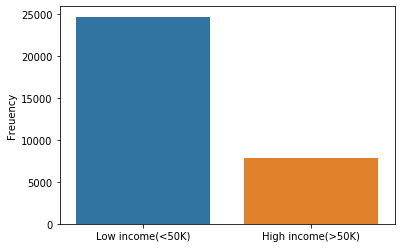

In [6]:
# Bar plot to visualise class balance
axis = seaborn.barplot(x=["Low income(<50K)","High income(>50K)"], y=target.value_counts())
axis.set(ylabel ='Freuency')

In [7]:
# Splitting the data into train and test sets
train_x,test_x, train_y, test_y = train_test_split(features, target, test_size=0.2, stratify=target, random_state=20)

In [8]:
# Building a default Random forest classifier
rf_classifier = RandomForestClassifier(random_state=100,verbose=1)
rf_classifier.fit(train_x, train_y)
# Predicting on the test set
predicted = rf_classifier.predict(test_x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [9]:
# Computing evaulation metrics (precision,recall,f1-score) for the default parameter model
print(metrics.classification_report(test_y, predicted))
print(metrics.f1_score(test_y, predicted))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4945
           1       0.74      0.59      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513

0.6550991501416431


In [10]:
# Computing the confusion matrix for the default parameter model
print(metrics.confusion_matrix(test_y, predicted))

[[4614  331]
 [ 643  925]]


In [11]:
# Computing the area under the curve for the default parameter model
prob = rf_classifier.predict_proba(test_x)
fpr, tpr, threshold = metrics.roc_curve(test_y, prob[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print("The ROC-AUC for the default model is:", roc_auc)

The ROC-AUC for the default model is: 0.8818671199521264


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [12]:
# Usinf a full grid search all parameters
param_grid = {"n_estimators": [100,300,500],
              "max_depth": [None, 3, 5, 7],
              "max_features": [1, 3, 5, 10],
              "min_samples_split": [3, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Running the grid search
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, n_jobs = 10, cv = 5, verbose = 1)
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   24.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 10.0min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed: 15.3min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed: 23.6min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed: 34.3min
[Parallel(n_jobs=10)]: Done 2880 out of 2880 | elapsed: 40.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    4.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=1, warm_start=False),
             iid='warn', n_jobs=10,
             param_grid={'boots

In [13]:
# Extracting the parameters from the best model
best_params = grid_search.best_params_
best_params

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [14]:
# Using the tuned parameters for the Random Forest model
rf_classifier_tuned = RandomForestClassifier(random_state=100,**best_params)
rf_classifier_tuned.fit(train_x, train_y)
# Predicting the outcome for the test set
predicted_tuned = rf_classifier_tuned.predict(test_x)

In [15]:
# Computing evaulation metrics (precision,recall,f1-score) for the tuned parameter model
print(metrics.classification_report(test_y, predicted_tuned))
print(metrics.f1_score(test_y, predicted_tuned))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4945
           1       0.77      0.64      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513

0.6957736639888229


In [16]:
# Computing the confusion matrix for the tuned parameter model
print(metrics.confusion_matrix(test_y, predicted_tuned))

[[4646  299]
 [ 572  996]]


In [17]:
# Computing the area under the curve for the tuned parameter model
prob_tuned = rf_classifier_tuned.predict_proba(test_x)
fpr_tuned, tpr_tuned, threshold_tuned = metrics.roc_curve(test_y, prob_tuned[:, 1])
roc_auc_tuned = metrics.auc(fpr_tuned, tpr_tuned)
print("The ROC-AUC for the tuned model is:", roc_auc_tuned)

The ROC-AUC for the tuned model is: 0.9136965807556592


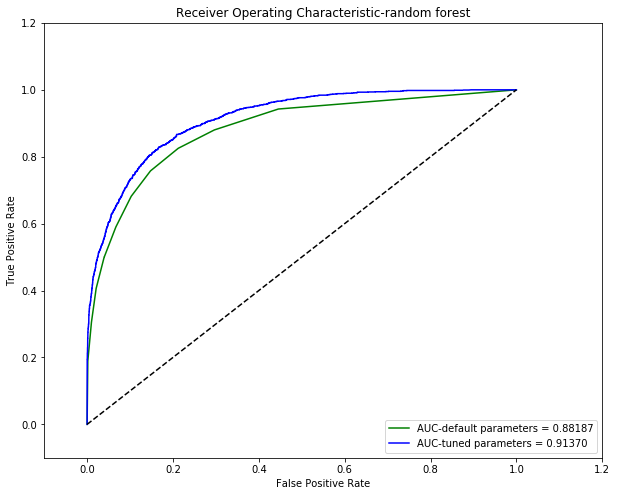

In [18]:
# Comparing the default model and the tuned model visually
fig = plt.figure(figsize = (10,8))
plt.title('Receiver Operating Characteristic-random forest')
plt.plot(fpr, tpr, 'g',
label='AUC-default parameters = %0.5f'% roc_auc)


plt.plot(fpr_tuned, tpr_tuned, 'b',
label='AUC-tuned parameters = %0.5f'% roc_auc_tuned)


plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Feature ranking:
age: 10 (0.156041):
workclass: 0 (0.126225):
fnlwgt: 4 (0.110761):
education: 2 (0.104927):
education-num: 5 (0.102925):
marital-status: 7 (0.102677):
occupation: 12 (0.077460):
relationship: 6 (0.062982):
race: 11 (0.042476):
sex: 1 (0.033367):
capital-gain: 3 (0.031118):
capital-loss: 9 (0.021150):
hours-per-week: 13 (0.015842):
native-country: 8 (0.012050):


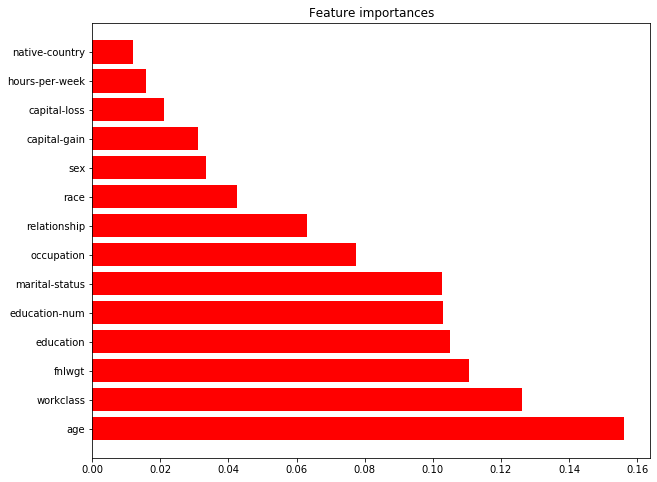

In [19]:
# Analysing variable importance
importances = rf_classifier_tuned.feature_importances_
std = np.std([rf_classifier_tuned.feature_importances_ for tree in rf_classifier_tuned.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for j in range(train_x.shape[1]):
    print("%s: %d (%f):" % (df.columns[j] , indices[j], importances[indices[j]]))

# Plot the feature importances of the forest
fig = plt.figure(figsize = (10,8))
plt.title("Feature importances")
plt.barh(range(train_x.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(train_x.shape[1]), df.columns)
plt.ylim([-1, train_x.shape[1]])
plt.show()